In [1]:
import numpy as np
from scipy.linalg import expm

A = np.array([[1,1,0],
             [0,0,2],
             [0,0,-1]])
A = np.asmatrix(A)
print(A)
print(expm(A))

[[ 1  1  0]
 [ 0  0  2]
 [ 0  0 -1]]
[[2.71828183 1.71828183 1.08616127]
 [0.         1.         1.26424112]
 [0.         0.         0.36787944]]


In [2]:
# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_componentes(valores_onda, evolucao_d, componente):
    
    ts1 = np.linspace(0, 10, 628)
    ts2 = np.linspace(0, 10, 628)
    
    real_primeiro = [elemento.real for elemento in valores_onda[componente-1]]
    imaginario_primeiro = [elemento.imag for elemento in valores_onda[componente-1]]
    
    real_segundo = [elemento.real for elemento in evolucao_d[componente-1]]
    imaginario_segundo = [elemento.imag for elemento in evolucao_d[componente-1]]
    
    # Plotagem
    plt.subplot(2,1,1)

    plt.ylabel('Pesos') 
    plt.xlabel('Tempo') 
    plt.title(f"{componente}ª componente -> real")
    plt.plot(ts1, real_primeiro, color='r', marker='*', linewidth=1, markersize=1, label="primeiro")
    plt.plot(ts2, real_segundo, color='b', marker='o',  linewidth=1, markersize=1, label="segundo")
    plt.legend(loc='upper right')
    
    plt.subplot(2,1,2)

    plt.ylabel('Imaginário') 
    plt.xlabel('Tempo') 
    plt.title(f"{componente}ª componente -> imaginária")
    plt.plot(ts1, imaginario_primeiro, color='r', marker='*', linewidth=1, markersize=1, label="primeiro")
    plt.plot(ts2, imaginario_segundo, color='b', marker='o',  linewidth=1, markersize=1, label="segundo")
    plt.legend(loc='upper right')

    plt.tight_layout()
    

In [3]:
H = np.ones((2,2), dtype=np.complex_)
R = np.ones((2,2), dtype=np.complex_)
H = [[1/2*np.pi,0],[0,-1/2*np.pi]]

for i in range(0, 5):
    R = np.dot(np.dot(-1j,H),i/100.0)
    U = expm(R)
    U = np.asmatrix(U)
    U_dagger = U.getH()
    print(U)
    print("=========")

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[0.99987663-0.01570732j 0.        +0.j        ]
 [0.        +0.j         0.99987663+0.01570732j]]
[[0.99950656-0.03141076j 0.        +0.j        ]
 [0.        +0.j         0.99950656+0.03141076j]]
[[0.99888987-0.04710645j 0.        +0.j        ]
 [0.        +0.j         0.99888987+0.04710645j]]
[[0.99802673-0.06279052j 0.        +0.j        ]
 [0.        +0.j         0.99802673+0.06279052j]]


In [4]:
ts = np.linspace(0, 10, 1000)

PSI_0 = np.ones((2,2), dtype=np.complex_)
PSI_0 = [[0.80],[0.60]]
PSI_1 = np.ones((2,2), dtype=np.complex_)
PSI_1 = [[0.40],[0.916]]
H = np.ones((2,2), dtype=np.complex_)
ro = 0.65*np.matmul(PSI_0, np.transpose(PSI_0))+0.35*np.matmul(PSI_1, np.transpose(PSI_1))

for i in range(0, 5):
    
    H = [[np.exp(-1j*np.pi*i/2),0],[0,np.exp(1j*np.pi*i/2)]]
    U = H
    U = np.asmatrix(U)
    U_dagger = U.getH()
    print("-----------")
    print(f"{i}pi")
    print(np.matmul(np.matmul(U,ro),U_dagger))
    print("-----------")

-----------
0pi
[[0.472    +0.j 0.44024  +0.j]
 [0.44024  +0.j 0.5276696+0.j]]
-----------
-----------
1pi
[[ 0.472    +0.00000000e+00j -0.44024  -5.39138507e-17j]
 [-0.44024  +5.39138507e-17j  0.5276696+0.00000000e+00j]]
-----------
-----------
2pi
[[0.472    +0.00000000e+00j 0.44024  +1.07827701e-16j]
 [0.44024  -1.07827701e-16j 0.5276696+0.00000000e+00j]]
-----------
-----------
3pi
[[ 0.472    +0.00000000e+00j -0.44024  -1.61741552e-16j]
 [-0.44024  +1.61741552e-16j  0.5276696+0.00000000e+00j]]
-----------
-----------
4pi
[[0.472    +0.00000000e+00j 0.44024  +2.15655403e-16j]
 [0.44024  -2.15655403e-16j 0.5276696+0.00000000e+00j]]
-----------


In [5]:
ts = np.linspace(0, 10, 1000)

PSI = np.ones((2,2), dtype=np.complex_)
PSI = [[0.80],[0.60]]
H = np.ones((2,2), dtype=np.complex_)
ro = np.matmul(PSI, np.transpose(PSI))

for i in range(0, 5):
    
    H = [[np.exp(-1j*np.pi*i/2),0],[0,np.exp(1j*np.pi*i/2)]]
    U = H
    U = np.asmatrix(U)
    U_dagger = U.getH()
    print("-----------")
    print(f"{i}pi")
    print(np.matmul(np.matmul(U,ro),U_dagger))
    print("-----------")

-----------
0pi
[[0.64+0.j 0.48+0.j]
 [0.48+0.j 0.36+0.j]]
-----------
-----------
1pi
[[ 0.64+0.00000000e+00j -0.48-5.87830464e-17j]
 [-0.48+5.87830464e-17j  0.36+0.00000000e+00j]]
-----------
-----------
2pi
[[0.64+0.00000000e+00j 0.48+1.17566093e-16j]
 [0.48-1.17566093e-16j 0.36+0.00000000e+00j]]
-----------
-----------
3pi
[[ 0.64+0.00000000e+00j -0.48-1.76349139e-16j]
 [-0.48+1.76349139e-16j  0.36+0.00000000e+00j]]
-----------
-----------
4pi
[[0.64+0.00000000e+00j 0.48+2.35132185e-16j]
 [0.48-2.35132185e-16j 0.36+0.00000000e+00j]]
-----------


In [6]:
evolucao_1 = np.zeros((1,628), dtype=np.complex_)

In [7]:
ts = np.linspace(0, 10, 1000)

PSI = np.ones((2,2), dtype=np.complex_)
PSI = [[0.80],[0.60]]
H = np.ones((2,2), dtype=np.complex_)
ro = np.matmul(PSI, np.transpose(PSI))

for i in range(0, 628):
    
    H = [[np.exp(1j*np.pi*i/200),0],[0,np.exp(-1j*np.pi*i/200)]]
    U = H
    U = np.asmatrix(U)
    U_dagger = U.getH()
    print("-----------")
    teste = np.dot(np.dot(U,ro),U_dagger)
    teste = np.squeeze(np.asarray(teste))
    print(teste)
    evolucao_1[0][i] = teste[0][1]
    print("-----------")

-----------
[[0.64+0.j 0.48+0.j]
 [0.48+0.j 0.36+0.j]]
-----------
-----------
[[0.64      +0.00000000e+00j 0.47976315+1.50771644e-02j]
 [0.47976315-1.50771644e-02j 0.36      +8.67361738e-19j]]
-----------
-----------
[[0.64      +0.00000000e+00j 0.47905283+3.01394494e-02j]
 [0.47905283-3.01394494e-02j 0.36      +1.73472348e-18j]]
-----------
-----------
[[0.64      +0.j         0.47786974+0.04517199j]
 [0.47786974-0.04517199j 0.36      +0.j        ]]
-----------
-----------
[[0.64      +0.00000000e+00j 0.47621506+6.01599521e-02j]
 [0.47621506-6.01599521e-02j 0.36      +3.46944695e-18j]]
-----------
-----------
[[0.64     -6.93889390e-18j 0.4740904+7.50885432e-02j]
 [0.4740904-7.50885432e-02j 0.36     +0.00000000e+00j]]
-----------
-----------
[[0.64      -6.9388939e-18j 0.47149788+8.9943031e-02j]
 [0.47149788-8.9943031e-02j 0.36      +0.0000000e+00j]]
-----------
-----------
[[0.64      +0.j         0.46844005+0.10470876j]
 [0.46844005-0.10470876j 0.36      +0.j        ]]
-----------


In [8]:
evolucao_2 = np.zeros((1,628), dtype=np.complex_)

In [9]:
def dpsi_dt(t, ro, H): # A derivada da ro em relação ao tempo não tem dependência temporal
    A = np.zeros((2,2), dtype=np.complex_)
    A = (np.dot(H,ro))-(np.dot(ro,H)) # [H,p]
    return -1j*A

# Runge-Kutta de quarta ordem

def runge_kutta(ro, fator_runge_kutta, hamiltoniano, tempo_primeiro = 0):

    k1 = dpsi_dt(tempo_primeiro, ro, hamiltoniano)
    k2 = dpsi_dt(tempo_primeiro + 0.5 * fator_runge_kutta, ro + 0.5*fator_runge_kutta*k1, hamiltoniano)
    k3 = dpsi_dt(tempo_primeiro + 0.5 * fator_runge_kutta, ro + 0.5*fator_runge_kutta*k2, hamiltoniano)
    k4 = dpsi_dt(tempo_primeiro + fator_runge_kutta, ro + 0.5*fator_runge_kutta*k3, hamiltoniano)
    
    ## y(i+1) = y(i) + h/6*(k1+2*k2+2*k3+k4)
    
    A = (np.dot(2,k3) + k4)
    B = (np.dot(2,k2) + k1)
    C = (A + B)

    runge = ro + np.dot((fator_runge_kutta / 6.0),(C))
    
    return runge

H = [[1/2*np.pi,0],[0,3/2*np.pi]]
for i in range(0, 628):

    teste = runge_kutta(ro, 0.01, H)
    print("-----------")
    print(teste)
    evolucao_2[0][i] = teste[0][1]
    print("-----------")
    ro = teste

-----------
[[0.64      +0.j         0.47980262+0.01507778j]
 [0.47980262-0.01507778j 0.36      +0.j        ]]
-----------
-----------
[[0.64      +0.j         0.47913169+0.03014317j]
 [0.47913169-0.03014317j 0.36      +0.j        ]]
-----------
-----------
[[0.64      +0.j         0.47798781+0.04518128j]
 [0.47798781-0.04518128j 0.36      +0.j        ]]
-----------
-----------
[[0.64      +0.j         0.47637202+0.06017728j]
 [0.47637202-0.06017728j 0.36      +0.j        ]]
-----------
-----------
[[0.64      +0.j         0.47428583+0.07511636j]
 [0.47428583-0.07511636j 0.36      +0.j        ]]
-----------
-----------
[[0.64      +0.j         0.47173124+0.08998376j]
 [0.47173124-0.08998376j 0.36      +0.j        ]]
-----------
-----------
[[0.64      +0.j        0.46871069+0.1047648j]
 [0.46871069-0.1047648j 0.36      +0.j       ]]
-----------
-----------
[[0.64      +0.j         0.46522707+0.11944488j]
 [0.46522707-0.11944488j 0.36      +0.j        ]]
-----------
-----------
[[0.64  

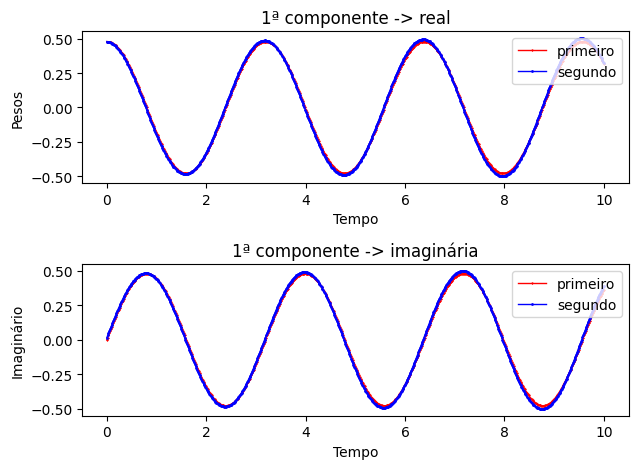

In [10]:
plot_componentes(evolucao_1, evolucao_2, 1)